---
# 
---

In this notebook, 

1. 


### Importing necessary libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Define files

In [2]:
data_dir = '../data/GreenHouse_Gases/'

data_1850_2011 = 'co2_1850-2011.txt' # Tab separated

data_1959_2024 = 'co2_annmean_mlo_1959-2024.txt' # Spaces separated

fcst_mod_2000_2099 = 'co2_2000-2099_ScenarioModerate.txt' # Tab separated

fcst_weak_2000_2099 = 'co2_2000-2099_ScenarioWeak.txt' # Tab separated

out_dir = '../data/GreenHouse_Gases/processed/'

file_out_mod = 'co2_1850-2099_ScenarioModerate.csv'

file_out_weak = 'co2_1850-2099_ScenarioWeak.csv'

### Read files

In [3]:
obs_1850_2011 = pd.read_csv(os.path.join(data_dir, data_1850_2011), sep='\t', skiprows=2)

obs_1850_2011['Year'] = pd.to_datetime(obs_1850_2011['Year'],  format="%Y")
obs_1850_2011.set_index('Year', inplace=True)

obs_1850_2011

,Data Source,MixR
Year,,
1850-01-01,Ice-Core Data Adjusted for Global Mean,285.20
1851-01-01,Ice-Core Data Adjusted for Global Mean,285.10
1852-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1853-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1854-01-01,Ice-Core Data Adjusted for Global Mean,284.90
...,...,...
2007-01-01,NOAA/ESRL trends change added to 2003 data,383.37
2008-01-01,NOAA/ESRL trends change added to 2003 data,385.46
2009-01-01,NOAA/ESRL trends change added to 2003 data,386.95


In [4]:
obs_1959_2024 = pd.read_csv(os.path.join(data_dir, data_1959_2024), sep='\s+', skiprows=44)

obs_1959_2024.rename(columns={'year':'Year','mean':'MixR'}, inplace=True)
obs_1959_2024.drop(columns='unc', inplace=True)

obs_1959_2024['Year'] = pd.to_datetime(obs_1959_2024['Year'],  format="%Y")
obs_1959_2024.set_index('Year', inplace=True)

obs_1959_2024

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3020162/3748685906.py:1: SyntaxWarning: invalid escape sequence '\s'
  obs_1959_2024 = pd.read_csv(os.path.join(data_dir, data_1959_2024), sep='\s+', skiprows=44)


,MixR
Year,
1959-01-01,315.98
1960-01-01,316.91
1961-01-01,317.64
1962-01-01,318.45
1963-01-01,318.99
...,...
2020-01-01,414.21
2021-01-01,416.41
2022-01-01,418.53


In [5]:
fcst_mod = pd.read_csv(os.path.join(data_dir, fcst_mod_2000_2099), sep='\t', skiprows=3)

fcst_mod['Year'] = pd.to_datetime(fcst_mod['Year'],  format="%Y")
fcst_mod.set_index('Year', inplace=True)

fcst_mod

,MixR
Year,
2000-01-01,370.0
2001-01-01,371.7
2002-01-01,373.4
2003-01-01,375.1
2004-01-01,376.9
...,...
2095-01-01,559.3
2096-01-01,559.6
2097-01-01,559.8


In [6]:
fcst_weak = pd.read_csv(os.path.join(data_dir, fcst_weak_2000_2099), sep='\t', skiprows=3)

fcst_weak['Year'] = pd.to_datetime(fcst_weak['Year'],  format="%Y")
fcst_weak.set_index('Year', inplace=True)

fcst_weak

,MixR
Year,
2000-01-01,370.0
2001-01-01,371.7
2002-01-01,373.4
2003-01-01,375.1
2004-01-01,376.8
...,...
2095-01-01,474.8
2096-01-01,474.9
2097-01-01,474.9


### Plot the data

In [7]:
start_obs2 = obs_1959_2024.index.min()
end_obs2 = obs_1959_2024.index.max()

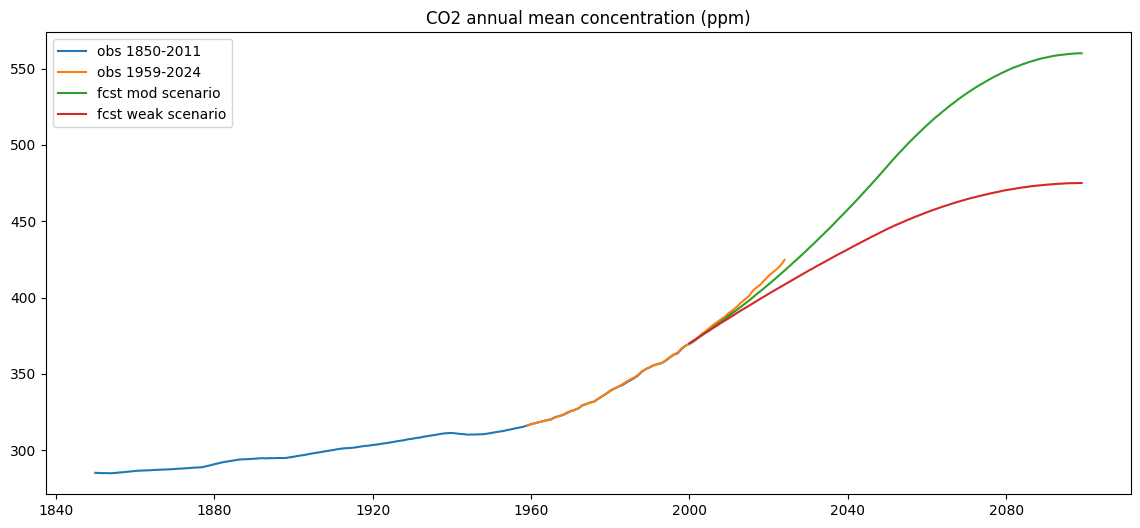

In [8]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['MixR'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['MixR'], label='obs 1959-2024')
ax = plt.plot(fcst_mod.index, fcst_mod['MixR'], label='fcst mod scenario')
ax = plt.plot(fcst_weak.index, fcst_weak['MixR'], label='fcst weak scenario')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

### Adjust forecast dataset to have the same concentration as obs for year 2024

In [9]:
const_mod = obs_1959_2024[obs_1959_2024.index == end_obs2]['MixR'].values[0] - fcst_mod[fcst_mod.index == end_obs2]['MixR'].values[0]
const_mod

const_weak = obs_1959_2024[obs_1959_2024.index == end_obs2]['MixR'].values[0] - fcst_weak[fcst_weak.index == end_obs2]['MixR'].values[0]
const_weak

fcst_mod['MixR'] = fcst_mod['MixR'] + const_mod
fcst_weak['MixR'] = fcst_weak['MixR'] + const_weak

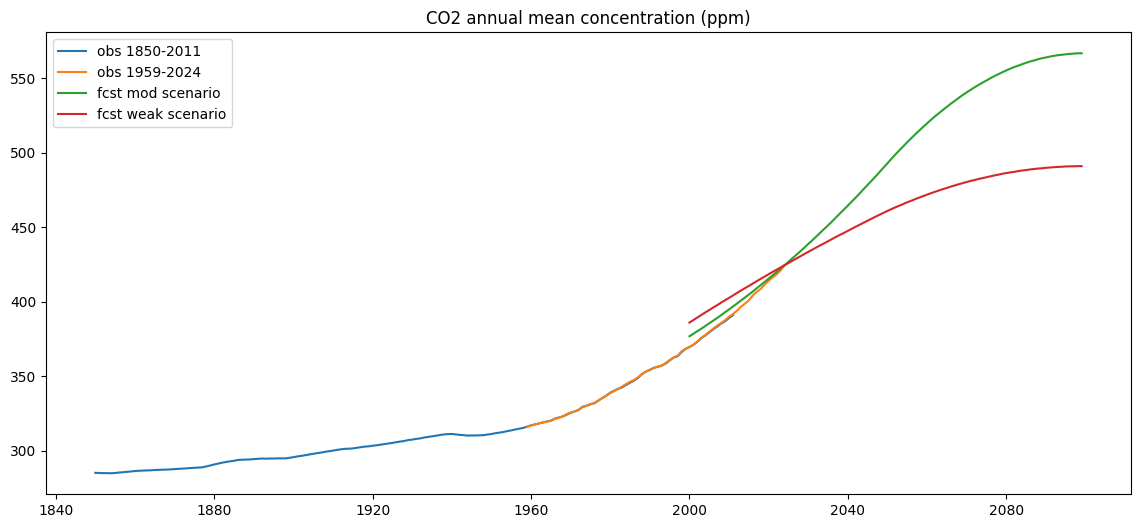

In [10]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['MixR'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['MixR'], label='obs 1959-2024')
ax = plt.plot(fcst_mod.index, fcst_mod['MixR'], label='fcst mod scenario')
ax = plt.plot(fcst_weak.index, fcst_weak['MixR'], label='fcst weak scenario')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

### Create dataframe that contains the observation from 1850 to 2024

In [11]:
obs_df = pd.concat([obs_1850_2011[obs_1850_2011.index < start_obs2], obs_1959_2024])
obs_df

,Data Source,MixR
Year,,
1850-01-01,Ice-Core Data Adjusted for Global Mean,285.20
1851-01-01,Ice-Core Data Adjusted for Global Mean,285.10
1852-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1853-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1854-01-01,Ice-Core Data Adjusted for Global Mean,284.90
...,...,...
2020-01-01,NaN,414.21
2021-01-01,NaN,416.41
2022-01-01,NaN,418.53


### Looking if there is missing values

In [12]:
obs_df.isna().sum()

Data Source    66
MixR            0
dtype: int64

### Creating a dataframe that contains observations and the forecast data

In [13]:
full_mod_df = pd.concat([obs_1850_2011[obs_1850_2011.index < start_obs2], obs_1959_2024, fcst_mod[fcst_mod.index > end_obs2]])
full_weak_df = pd.concat([obs_1850_2011[obs_1850_2011.index < start_obs2], obs_1959_2024, fcst_weak[fcst_weak.index > end_obs2]])

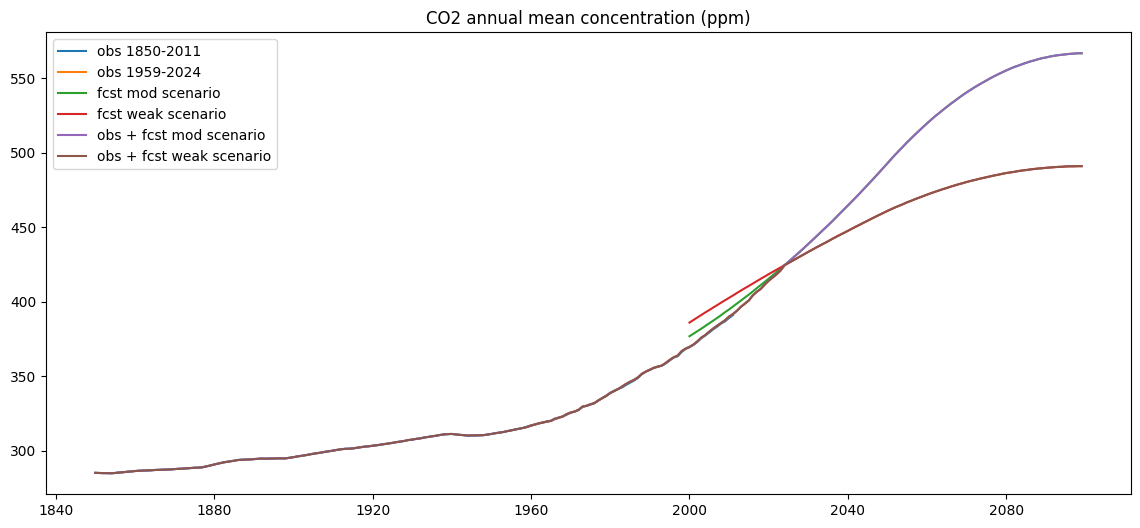

In [14]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['MixR'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['MixR'], label='obs 1959-2024')
ax = plt.plot(fcst_mod.index, fcst_mod['MixR'], label='fcst mod scenario')
ax = plt.plot(fcst_weak.index, fcst_weak['MixR'], label='fcst weak scenario')
ax = plt.plot(full_mod_df.index, full_mod_df['MixR'], label='obs + fcst mod scenario')
ax = plt.plot(full_weak_df.index, full_weak_df['MixR'], label='obs + fcst weak scenario')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

### Write data to file

In [15]:
full_mod_df.to_csv(os.path.join(out_dir, file_out_mod))
full_weak_df.to_csv(os.path.join(out_dir, file_out_weak))